        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Supervised Learning - Part I</h1>

<p>Supervised involves  modeling the relationship between measured features of data (independent variables) and some label associated with the data (dependent variable); once this model is determined, it can be used to apply labels unknown data. There are two common forms of supervised learning:
    <ul>
        <li>Regression - labels are continuous quantities</li>
        <li>Classification - labels are categorical data</li>
    </ul>
</p>

<p><b>Quick introduction to Scikit-Learn</b>: Scikit-Learn provides efficient versions of a large number of common machine learning algorithms. Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.</p>

<p><b>Note:</b> You need to be familiar with the following terms.
<ul>
    <li><b>Data samples</b>: Number of obsevations - number of rows in dataset. Presented by <i>n_samples</i> </li>
    <li><b>Features</b>: Pieces of information describing observations - number of columns in dataset. Presented by <i>n_features</i> </li>
    <li><b>Features matrix</b>: A matrix containing observation samples with different features.
    <ul>
        <li> By convention, this matrix is often stored in a variable named <i>X</i></li>
        <li> Shape: (n_samples, n_features) </li>
        <li> Can be in a form of NumPy array, Pandas Dataframe, or SciPy sparse matrices</li>
    </ul>
    </li>
    <li><b>Target array</b>: We also generally work with a label array.
    <ul>
        <li>By convention we will usually call <i>y</i></li>
        <li>Shape: (n_samples, 1)</li>
        <li>Can be in a form of NumPy array, Pandas Series</li>
    </ul>
    </li>
    
</ul>
</p>    

<p><img src="./Images/data.png" style='width:300px'/></p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Let's load Iris dataset
!curl -O http://aima.cs.berkeley.edu/data/iris.csv
iris_dataset = pd.read_csv('iris.csv', header = None , names= ['sepal_length', 'sepal_width','petal_length','petal_width','species'])
iris_dataset.head()    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3800  100  3800    0     0  36538      0 --:--:-- --:--:-- --:--:-- 36538


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


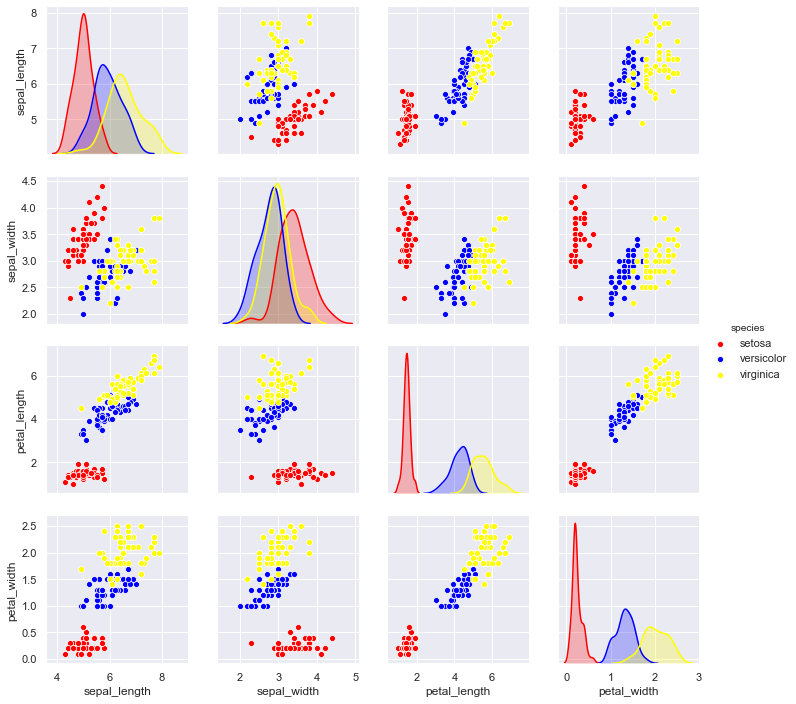

In [3]:
# seaborn pairplot is a great way to visualize the dataset before conducting further analysis 
%matplotlib inline
import seaborn as sns; sns.set() 
sns.pairplot(iris_dataset, hue='species', height=2.5, 
             palette = {'setosa':'red','versicolor':'blue', 'virginica':'yellow' });

In [4]:
# Let's set the variables
X_iris = iris_dataset.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris_dataset.loc[:,'species']
y_iris.shape

(150,)

<p><b>Note:</b> In most cases, in order to test the predictivity power of your model, you need to divide your dataset into separate training and testing sets. In order to do so, you can use scikit-learn's <b style='color:blue'>train_test_split( )</b> function.</p>

In [6]:
# Here is an example
from sklearn.model_selection import train_test_split
features = ['sepal_length','sepal_width','petal_length','petal_width']
target = 'species'
X = iris_dataset.loc[:,features]
y = iris_dataset.loc[:,target]
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train shape is {}".format(X_train.shape))
print("y_train shape is {}".format(y_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_test shape is {}".format(y_test.shape))

X_train shape is (105, 4)
y_train shape is (105,)
X_test shape is (45, 4)
y_test shape is (45,)


<p><b>Note:</b> In general, in order to use Scikit-Learn for data modeling, you need to follow these steps: (We will go through examples to show how that works) 
<ol>
    <li>Choose a class of model.
        <ul>
            <li>In Scikit-Learn, every class of model is represented by a Python class.</li>
        </ul>
    </li>
    <li> Instantiate your model by choosing model hyperparameters.
        <ul>
            <li> Once we have selected the desired class of model, there are still some options (hyperparameters) that should be set. These paramters are depending on the class of our model.</li>
            <li> Here are some possible questions that should be answered to set the hyperparameters.
            <ul>
                <li>Would we like to fit for the intercept?</li>
                <li>Would we like the model to be normalized?</li>
                <li>What degree of regularization would we like to use in our model?</li>
            </ul>
            </li>
        </ul>
    </li>
    <li>Arrange data into a features matrix and target array.</li>
    <li>Fit the model to your data.</li>
    <li>Predict labels for unknown data</li>
</ol>    
</p>

## 1. Basic Regression Models

### 1.1. Simple Linear Regression

<p>In statistics, linear regression is a linear approach to modelling the relationship between a target response (or dependent variable) and one feature (or independent variable).
    
<div style='text-align:center'>$y = \beta_0 + \beta_1 X_{1}$</div>

<p> We can use this simple approach to develope a machine learning algorithm for data prediction. Here is an example: </p>

In [7]:
# Let's generate a sample dataset
rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 1 + rng.randn(100) 

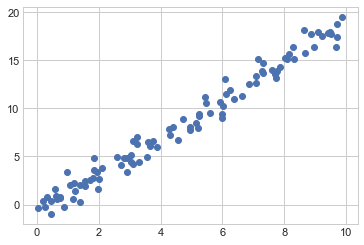

In [8]:
# Let's visualize the data
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y);

In [9]:
# Step 1: Choose a class of model.
# Now, it's time to create the simple regression model.
# As discussed earlier, the first step is to choose the class of our model.
# In this case, we plan to use linear regression.
from sklearn.linear_model import LinearRegression

In [10]:
# Step 2: instantiate our model by choosing hyperparameters
# Keep in mind that when the model is instantiated, the only action is 
# the storing of these hyperparameter values. In particular, we have not 
# yet applied the model to any data
model = LinearRegression(fit_intercept = True)

In [11]:
# Step 3: Arrange data into a features matrix and target array.
# As we discussed, features matrix should have the (n_samples, n_features) shape.
# and y should have (n_samples, 1) shape
# let's check our x and y shapes
print('x.shape is {}'.format(x.shape))
print('y.shape is {}'.format(y.shape))

x.shape is (100,)
y.shape is (100,)


In [12]:
# We need to change it to the right shape
X = x.reshape(100,1)      # Notice that we put the data into X and not x
y = y.reshape(100,1)
print('X.shape is {}'.format(X.shape))
print('y.shape is {}'.format(y.shape))

X.shape is (100, 1)
y.shape is (100, 1)


In [32]:
# Now, we can put data into train and test sets 
#X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

In [15]:
# Step 4: Fit the model to your data.
model.fit(X_train, y_train);

In [16]:
# you can use coef_ and intercept_ properties to check the estimated values
print("Model Coef")
print(model.coef_)
print()
print("Model Intercept")
print(model.intercept_)

Model Coef
[[1.93565901]]

Model Intercept
[-0.795135]


In [36]:
# Step 5: Predict labels for unknown data.
y_test_hat = model.predict(X_test)

In [ ]:
#X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

<p><b>Note:</b> There are different ways to evaluate the goodness of your prediction (we will discuss about them in more details). One basic approach is to visualize the original data and predicted values.</p> 

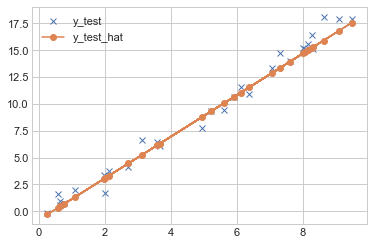

In [18]:
plt.plot(X_test,y_test, linestyle = 'None', marker='x', label='y_test')
plt.plot(X_test,y_test_hat, linestyle = '-', marker='o', label='y_test_hat')
plt.legend();

### 1.2. Multiple Regression

<p>In machine learning, a multiple regression model is a sum of weighted variables that predicts a target output value by using a given set of features.</p>

<div style='text-align:center'>$y_{house-price} = \beta_0 + \beta_1 X_{Tax} + \beta_2 X_{Age} + \beta_3 X_{DIS}$</div>

In [13]:
# Let's use boston dataset to run a multiple regression
from sklearn import datasets
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
feature_names = boston_dataset.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
X_train.shape

(70, 1)

In [24]:
y_train.shape

(70, 1)

In [38]:
# Step 1
from sklearn.linear_model import LinearRegression
# Step 2
model = LinearRegression()
# Step 3
X = boston_dataset.data        # This is a NumPy array
y = boston_dataset.target      # This is a NumPy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Step 4
model.fit(X_train, y_train)
# Step 5
y_test_hat = model.predict(X_test)

In [41]:
X_train.shape

In [ ]:
#model = LinearRegression()
#X = boston.data
#y = boston.target
#model.fit(X_train, y_train)
#y_test_hat = model.predict(X_test)

<p><b>Note:</b> While we do more multiple features, it is not possible to visualize the model like simple linear regression. However, it is recommended to plot y_test against y_test_hat.</p>

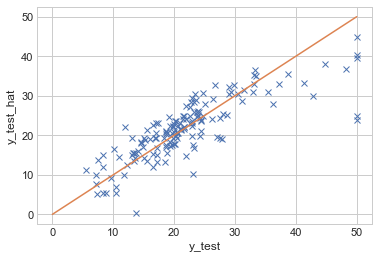

In [26]:
line_x = np.linspace(0, 50, 1000)
line_y = line_x
plt.plot(y_test,y_test_hat, linestyle = 'None', marker='x')
plt.plot(line_x,line_y)
plt.xlabel("y_test")
plt.ylabel("y_test_hat");

<p><b>Note:</b> You can also use the level of error in the prediction to check the performance of your model. There are three common measures for capturing the error in prediction:</p>
<ul>
    <li><b>MAE</b> (Mean Absolute Error) - $1/n \sum_{j=1}^{n} |y_j - \hat{y}_j| $ </li>
    <ul>
        <li>You can use sklearn's <b style="color:blue">mean_absolute_error( )</b> function to measure this metric</li>
    </ul>
    <li><b>MSE</b> (Mean Squared Error) - $1/n \sum_{j=1}^{n} (y_j - \hat{y}_j)^2 $</li>
    <ul>
        <li>You can use sklearn's <b style="color:blue">mean_squared_error( )</b> function to measure this metric</li>
    </ul>
    <li><b>RMSE</b> (Root Mean Squared Error) - $\sqrt{1/n \sum_{j=1}^{n} (y_j - \hat{y}_j)^2 }$</li>
    <ul>
        <li>You can apply sqrt( ) function to MSE to find this metric</li>
    </ul>
</ul>

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_test_hat)
MSE = mean_squared_error(y_test,y_test_hat)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 3.608265813410167
MSE = 27.183847647603407
RMSE = 5.213813158102561


<p><b>Note:</b> You can also use <b style='color:blue'>score( )</b> function to find the $R^2$ value</p>

In [43]:
# R2 for training set
model.score(X_train, y_train)

0.7644563391821222

In [44]:
# R2 for testing set
model.score(X_test, y_test)

0.673528086534723

### 1.3. Polynomial Regression

<p>In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an $n^{th}$ degree polynomial in x.</p>

<div style='text-align:center'>$y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$</div>

<p><b>Note:</b> There is no Polynomial Regression function in Scikit-Learn. However we can use the linear regression model to define the model.</p>

In [45]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))     # Explain about make_pipeline

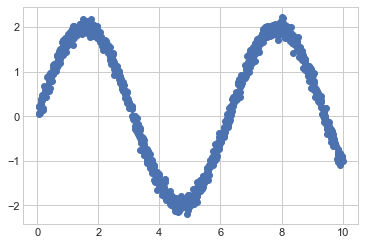

In [46]:
# Let's generate a sample dataset
rng = np.random.RandomState(42) 
x = 10 * rng.rand(1000)
y = 2 * np.sin(x) + 0.1 * rng.randn(1000)
plt.scatter(x, y);

In [47]:
# Step 1: We arleady defined the PolynomialRegression function
# Step 2:
model_degree1 = PolynomialRegression(degree = 1)
model_degree2 = PolynomialRegression(degree = 2)
model_degree3 = PolynomialRegression(degree = 3)
model_degree4 = PolynomialRegression(degree = 4)
# Step 3:
X = x.reshape(1000,1)      
y = y.reshape(1000,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Step 4
model_degree1.fit(X_train, y_train)
model_degree2.fit(X_train, y_train)
model_degree3.fit(X_train, y_train)
model_degree4.fit(X_train, y_train)
# Step 5
y_test_hat_degree1 = model_degree1.predict(X_test)
y_test_hat_degree2 = model_degree2.predict(X_test)
y_test_hat_degree3 = model_degree3.predict(X_test)
y_test_hat_degree4 = model_degree4.predict(X_test)

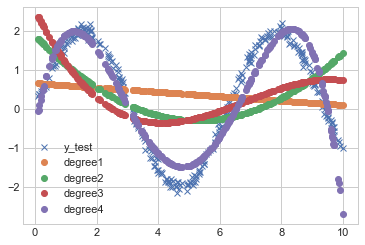

In [48]:
plt.plot(X_test,y_test, linestyle = 'None', marker='x', label='y_test')
plt.plot(X_test,y_test_hat_degree1, linestyle = 'None', marker='o', label='degree1')
plt.plot(X_test,y_test_hat_degree2, linestyle = 'None', marker='o', label='degree2')
plt.plot(X_test,y_test_hat_degree3, linestyle = 'None', marker='o', label='degree3')
plt.plot(X_test,y_test_hat_degree4, linestyle = 'None', marker='o', label='degree4')
plt.legend();

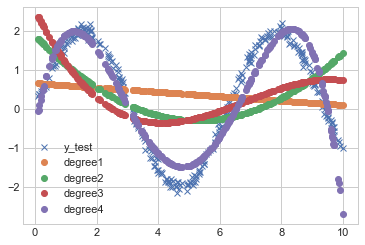

In [49]:
# can we write the above code in fewer lines?
X = x.reshape(1000,1)      
y = y.reshape(1000,1)
plt.plot(X_test,y_test, linestyle = 'None', marker='x', label='y_test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
for i in range(1,5):
    y_test_hat = PolynomialRegression(degree=i).fit(X_train, y_train).predict(X_test)
    plt.plot(X_test,y_test_hat, linestyle = 'None', marker='o', label='degree{}'.format(i))

plt.legend();

<p><b>Question:</b> Can you apply the polynomial regression to boston_dataset? Is that improve the prediction model?</p>

In [ ]:
# Write your answer over here

## 2. Basic Classification Models

### 2.1. Logistic Regression

<p>Logistic regression is used to model data and to explain the relationship between one binary dependent variable and one or more quantities.</p>

<div style='text-align:center'>$y = \dfrac{1}{1+e^{-z}} , z = \beta_0 + \beta_0 X_1 + \beta_2 X_2 + ... + \beta_m X_m $ </div>
<br>
<br>
<div style='text-align:center'>$prob(y^{(i)} = 1 | X^{(i)}) = \dfrac{1}{1+e^{-z^{(i)}}} , z^{(i)} = \beta_0 + \beta_0 X_1^{(i)} + \beta_2 X_2^{(i)} + ... + \beta_m X_m^{(i)} $ </div>

In [ ]:
z = np.linspace(-20, 20, 4000)
y = 1/(1+np.exp(-z))
plt.axhline(0, color='black',  alpha=.6)
plt.axvline(0, color='black',  alpha=.6)
plt.axhline(0.5, color='black', linestyle='--', alpha=.3)
plt.plot(z,y, color='green');
plt.title('Logistic Function')
plt.xlabel("z");

<p><b>Example:</b> Consider the boston dataset once again. This time, instead of predicting the actual housing price, you need to predict whether the price is above or below the average amount.</p>

In [14]:
boston_dataset = datasets.load_boston()        # If you are  not already load it
X = boston_dataset.data       
y = boston_dataset.target
avg_price = np.mean(y)                         # find the average price
flag = y > avg_price                           # Creat a flag for above avg prices
y[flag] = 1                                    # Conver data to 0-> below avg; 1-> above avg
y[~flag] = 0

In [ ]:
# Step 1
from sklearn.linear_model import LogisticRegression
# Step 2
model = LogisticRegression()
# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Step 4
model.fit(X_train, y_train)
# Step 5
y_test_hat = model.predict(X_test)

<p><b>Note:</b> You can use <b style='color:blue'>accuracy_score(<b style='color:black'>normalize</b> = <b style='color:red'>True</b>)</b> function to check the accuracy of your prediction in classification approaches.</p>
<br>
<div style='text-align:center; font-size:12pt'>$ Accuracy = \frac{\text{# true predicted cases}}{\text{#total cases}} \times 100 $</div>

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_hat, normalize = True) * 100

<p><b>Note:</b> In some cases, accuracy may not be a well representative metric to measure the quality of prediction. We will discuss more about it in the next example.</p>

In [ ]:
# Wisconsin Breast Cancer Dataset
breast_cancer_dataset = datasets.load_breast_cancer()
print(breast_cancer_dataset.DESCR)

In [ ]:
feature_names = breast_cancer_dataset.feature_names
feature_names

In [ ]:
X = breast_cancer_dataset.data       
y = breast_cancer_dataset.target            # 0 -> Malignant ; 1 -> Benign

<p><b>Example:</b> Use the 'mean radius' and 'mean texture' features to predict type of cancer (using the logistic regression).</p>

In [ ]:
# Step 1
from sklearn.linear_model import LogisticRegression
# Step 2
model = LogisticRegression()
# Step 3
X = X[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Step 4
model.fit(X_train, y_train)
# Step 5
y_test_hat = model.predict(X_test)

In [ ]:
# Let's first check the accuracy of the model on test set.
# We call this out of sample accuracy
accuracy_score(y_test,y_test_hat, normalize = True) * 100   

<p>Great. We have the accuracy of 90% in our prediction. But put yourself in the position of a health professional. Do you think that predicting Benign and Malignant worth the equally? You need to have measures that help you to check the performance of your prediction model for different categories.</p>

<p><b>Note:</b> You can use <u>Precision</u> and <u>Recall</u> values to check the performance of your model in prediction of different categories.</p>

<table style='width:500px'>
<tr style="background-color:white;height:50px">
    <td><b>Confusion Matrix</b></td>
    <td style='width:100px'></td>
    <td colspan=2 style='border: solid black 1px;text-align:center;font-size:12pt;font-family:times'><b>Predicted Value</b></td>
</tr>
<tr style="background-color:white;height:50px">
    <td ></td>
    <td ></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Negative (0)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Positive (1)</u></td>
</tr>
<tr style="background-color:white;height:100px">
    <td rowspan=2 style='border: solid black 1px;-webkit-transform: rotate(-90deg); -moz-transform: rotate(-90deg); font-size:12pt;font-family:times'><b>Actual Value</b></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Negative (0)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:green'>True Negative</td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:red'>False Positive <br><br> <i>Type I Error</i></td>
</tr>
<tr style="background-color:white;height:100px">
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Positive (1)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:red'>False Negative <i><br><br> Type II Error</i></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:green'>True Positive</td>
</tr>
</table>
<br><br><br>
<div style='text-align:center; font-size:12pt'>$ Precision = \frac{\sum{\text{True Positive}}}{\sum{\text{True Positive}}+\sum{\text{False Positive}}} $</div>
<br>
<br>
<div style='text-align:center; font-size:12pt'>$ Recall = \frac{\sum{\text{True Positive}}}{\sum{\text{True Positive}}+\sum{\text{False Negative}}} $</div>
<br>
<br>
<div style='text-align:center; font-size:12pt'>$ F1 = \frac{2 \times Precision \times Recall}{Precision + Recall} $</div>
<br>
<br>
<p>You can use <b style='color:blue;'>classification_report( )</b> and <b style='color:blue;'>confusion_matrix( )</b> functions to capture the above discuss metrics.</p>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

<p><b>Example:</b> Use 'mean perimeter' and 'mean area' features to create a logistic regression prediction model. Check accuracy, precision, and recall metrics for out of sample data.</p>

In [ ]:
# Write you answer over here

### 2.2. Naive Bayes

<p>Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for <u>very high-dimensional datasets</u>. In Bayesian classification, we’re interested in finding the probability of a label given some observed features, which we can write it as $P(L | features)$, Bayes’s theorem tells us how to express this in terms of quantities we can compute more directly.</p>
<br>
<br>
<div style='text-align:center; font-size:12pt'>$ P(L | features) = \frac{ P(features | L)P(L)}{P(features)} $</div>
<p>Where we refer to $P(L | features)$ as posterior, $P(features | L)$ as likelihood, and $P(L)$ as prior.</p>
<p>Then, if you are uncertain between two labels you can compute the ratio of the posterior probabilities for two labels, </p>
<br>
<div style='text-align:center; font-size:12pt'>$ \frac{P(L_1 | features)}{P(L_2 | features)} = \frac{ P(features | L_1)P(L_1)}{P(features | L_2)P(L_2)} $</div>
<br>
<p>Now, the only thing that we need to do is to compute $P(features | L_i)$ for each label. Such a model is called a <i>generative model</i> because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. In "Naive Bayes" we make very naive assumptions about the generative model. Different types of naive Bayes classifiers rest on different naive assumptions about the data:</p>
<ul>
    <li><b>Gaussian Naive Bayes</b> - The assumption is that data from each label is drawn from a simple Gaussian distribution.</li>
    <li><b>Multinomial Naive Bayes</b> - The main assumption is that features are generated from a simple multinomial distribution. Multinomial naive Bayes is most appropriate for features that represent counts or count rates. One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified (We will discuss about it in future sessions in more details). </li>
    <li><b>Bernoulli Naive Bayes</b> - If all features are independent and Boolean, it is safe to assume that they're the outcome of a Bernoulli process, then you can use the Bernoulli Naive Bayes classifier.</li>
</ul>
        

#### 2.2.1. Gaussian Naive Bayes

In [ ]:
# Let's consider a random dataset that are generated and assigned into two clusters
from sklearn.datasets import make_blobs

# Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=100, n_features = 2, centers=2, random_state=2, cluster_std=1.5) 

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

In [ ]:
# You don't need to understand the code for this visulazation
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'green']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2);

<p>The ellipses represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood $P(features | L_1)$ for any data point.</p>  
<p>This procedure is implemented in Scikit-Learn’s sklearn.naive_bayes.GaussianNB estimator</p>

In [ ]:
# Now, let'a create a random test data
rng = np.random.RandomState(0)
Xtest = [-6, -14] + [14, 18] * rng.rand(2000, 2) 

In [ ]:
# let's see visualzie the test and train data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
lim = plt.axis()
plt.scatter(Xtest[:, 0], Xtest[:, 1], s=20, c='black', alpha=0.05)
plt.axis(lim);

In [ ]:
# let's apply the Guassian  model
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X, y)
ytest = model.predict(Xtest)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
lim = plt.axis()
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=20, cmap='winter', alpha=0.1)
plt.axis(lim);

<p><b>Note:</b> In classificatio, predict function returns class numbers associated with each test observation. If you want to get the probabilities rather than class labels, you can use <b style="color:blue">predict_proba( )</b> function.</p>

In [ ]:
yprob = model.predict_proba(Xtest)

In [ ]:
Xtest[-5:,:]

In [ ]:
ytest[-5:]

In [ ]:
yprob[-5:].round(2)

<p><b>Example:</b> Consider the above example, and modify it to creat a dataset with three clusters. Apply classification and visualization methods to a new test sample.<p>

In [ ]:
# Write your code over here

<P><b>Question:</b> How can you measure the performance of your model in the above example? </p>

In [ ]:
# Write your code over here

<p><b>Note:</b> Naive Bayes models are extremely fast and simple classification algorithms. Naive Bayes models are  suitable for high-dimensional datasets. They are so fast and have so few tunable parameters. Naive Bayes models are usually consider as baseline model for a classification problem.</p>

<p>Naive Bayes classifiers perform especially well in the following situations:
    <ul>
        <li>When the naive assumptions actually match the data (very rare in practice)</li>
        <li>For very well-separated categories, when model complexity is less important</li>
        <li>For very high-dimensional data, when model complexity is less important</li>
</p>

### 2.3. K-Nearest Neighbors

<p>K-Nearest Neighbors (<b>k-NN</b>) belongs to the class of instance-based learning, also known as lazy classifiers. It's one of the simplest classification methods because the classification is done by just looking at the K-closest examples in the training set (in terms of distance) in the case that we want to classify. Then, given the K-similar examples, the most popular target (majority voting) is chosen as the classification label.</p>

<p>Two parameters are mandatory for this algorithm:
    <ol>
        <li>The neighborhood cardinality (K)</li>
        <li>The measure to evaluate the similarity - default is <u>Euclidean distance</u></li>
    </ol>
</p>

In [ ]:
# Let's consider iris_dataset
iris_dataset.head() 

In [ ]:
# let's just use two variables in our prediction model (that can help use to visualize)
X = iris_dataset.iloc[:,:2]
y = iris_dataset.loc[:,'species']
y = y.map({"virginica":0,"setosa":1, "versicolor":2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, lw=0.1, cmap='winter')
plt.colorbar(ticks=range(3), label='species')
plt.clim(-0.5, 2.5)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width');

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train);

In [ ]:
# Draw the decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - .5, X_train.iloc[:, 0].max() + .5
y_min, y_max = X_train.iloc[:, 1].min() - .5, X_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')

# let's show training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s=20 ,cmap='winter')
plt.colorbar(ticks=range(3), label='species')
plt.clim(-0.5, 2.5)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width');

In [ ]:
# let's check the performance of model on test set
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test)
accuracy_score(y_test,y_test_hat, normalize = True) * 100 

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))
y_test.value_counts( )

<p><b>Question:</b> How computation of Precision and Recall is different in multiclass dataset? </p> 